# Utopia Assignment  - 20th July 2021

**Author  -  Pragya Rai (Data Analyst)**

**Contact - drpragyasan@gmail.com**

## Problem Statement

There are two datasets:

1. consumption_data.csv; --> this file contains radio plays consumption for a particular region and timeframe

2. feed_station_mapping.csv; --> this file contains the mapping between feeds and stations

Context:

Radio play consumptions come in at 'feed' level, 
These can have a many-to-one relationship with a given radio station. 
The relationship between feeds and radios is to be found in the feed_station_mapping file. 


Your tasks:

1. Consolidate the data so that we do not double count plays coming from feeds that belong to the same station
   If you do not find the parent station for a given feed, just default to the feed info and use that as your 'station' instead.
2. Further clean the data as you deem approriate in order to perform an analysis on this dataset
3. Present the steps you have gone through for the data processing (eg. python notebook or any other data management tool you use)
4. Present any additional findings from the analysis you performed on the cleaned dataset in some visualisation tool (Tableau preferably but not mandatory)

### Import libraries

In [4]:
library(Amelia)
library(mlbench)
library(dplyr)
library(chron)
library(readr)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### 1. Consumption data

#### Load and analyse data

In [5]:
consumption_data <- read_csv("consumption_data.csv")



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Stamp = col_character(),
  Track = col_character(),
  Artist = col_character(),
  Feed_Id = col_character(),
  Feed_Name = col_character()
)




In [7]:
head(consumption_data)

Stamp,Track,Artist,Feed_Id,Feed_Name
<chr>,<chr>,<chr>,<chr>,<chr>
2019-06-07 18:38:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 09:04:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 19:51:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-09 20:52:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-10 11:06:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-14 07:09:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183


##### dataset is loaded as 'consumption_data' with 521974 observations

In [8]:
summary(consumption_data)


    Stamp              Track              Artist            Feed_Id         
 Length:521974      Length:521974      Length:521974      Length:521974     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  Feed_Name        
 Length:521974     
 Class :character  
 Mode  :character  

In [9]:
str(consumption_data)


spec_tbl_df [521,974 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Stamp    : chr [1:521974] "2019-06-07 18:38:00 +0000 UTC" "2019-06-08 09:04:00 +0000 UTC" "2019-06-08 19:51:00 +0000 UTC" "2019-06-09 20:52:00 +0000 UTC" ...
 $ Track    : chr [1:521974] "Song_02" "Song_02" "Song_02" "Song_02" ...
 $ Artist   : chr [1:521974] "artist_08" "artist_08" "artist_08" "artist_08" ...
 $ Feed_Id  : chr [1:521974] "feed_id_1377" "feed_id_1377" "feed_id_1377" "feed_id_1377" ...
 $ Feed_Name: chr [1:521974] "feed_name_1183" "feed_name_1183" "feed_name_1183" "feed_name_1183" ...
 - attr(*, "spec")=
  .. cols(
  ..   Stamp = col_character(),
  ..   Track = col_character(),
  ..   Artist = col_character(),
  ..   Feed_Id = col_character(),
  ..   Feed_Name = col_character()
  .. )


###### No missing data found

In [10]:
missing(consumption_data)

[1] FALSE

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


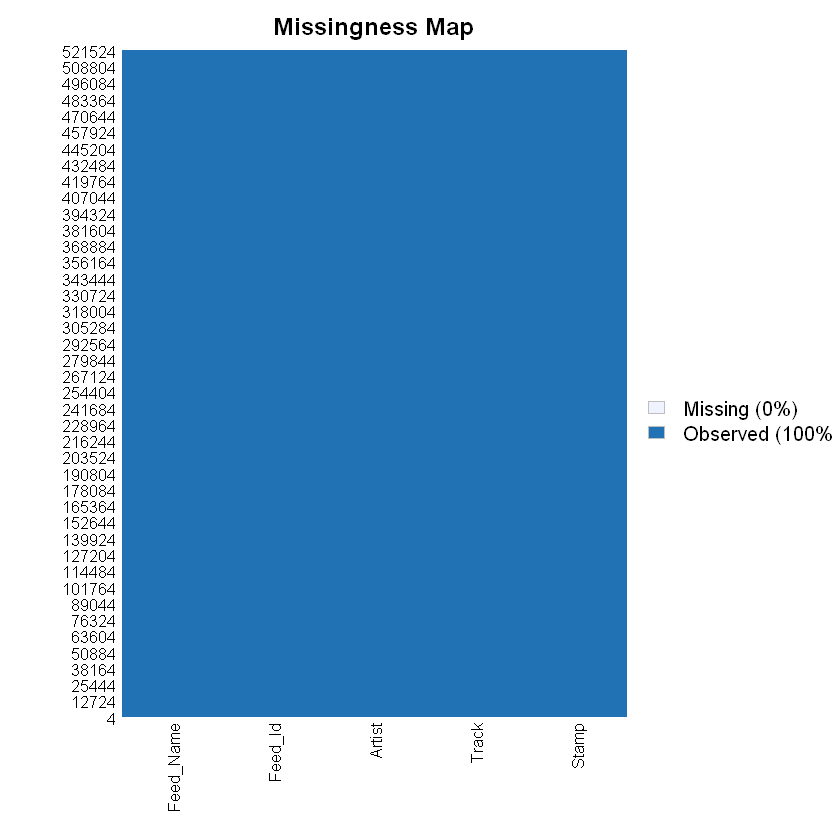

In [11]:
missmap(consumption_data) ##no missing data

### Clean the dataset

##### Remove duplicates (on athe combination of all the columns)

In [23]:
consumption_nodups <- consumption_data %>% distinct()

4909 duplicate records removed.

Now, 'consumption_nodup' is our new dataset with no duplicate data with 517065 observations

In [24]:
summary(consumption_nodups)

    Stamp              Track              Artist            Feed_Id         
 Length:517065      Length:517065      Length:517065      Length:517065     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  Feed_Name        
 Length:517065     
 Class :character  
 Mode  :character  

#### Formatting date time stamp

remove " +0000 UTC" (removal is done as matching data time format could not be found)

In [25]:
consumption_nodups$Stamp = substr(consumption_nodup$Stamp,1,19)

In [26]:
head(consumption_nodups$Stamp)

[1] "2019-06-07 18:38:00" "2019-06-08 09:04:00" "2019-06-08 19:51:00"
[4] "2019-06-09 20:52:00" "2019-06-10 11:06:00" "2019-06-14 07:09:00"

Format the date to type **"%Y-%m-%d %H:%M:%S"**

In [27]:
consumption_nodups$Stamp <- as.POSIXct(consumption_nodup$Stamp, format="%Y-%m-%d %H:%M:%S")

The date time formatting has resulted in 44 missing dates. 

In [28]:
summary(consumption_nodups)

     Stamp                        Track              Artist         
 Min.   :2019-01-01 00:02:00   Length:517065      Length:517065     
 1st Qu.:2019-06-17 12:47:00   Class :character   Class :character  
 Median :2019-11-13 20:43:00   Mode  :character   Mode  :character  
 Mean   :2019-11-17 05:25:42                                        
 3rd Qu.:2020-04-22 12:44:00                                        
 Max.   :2020-09-30 23:57:00                                        
 NA's   :44                                                         
   Feed_Id           Feed_Name        
 Length:517065      Length:517065     
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

Removing 44 records as their Stamp returns Null due to format mismatch

In [35]:
consumption_nodup <- consumption_nodups %>% filter(!is.na(Stamp))

Resulting in 517,021 observations

In [36]:
str(consumption_nodup)

tibble [517,021 x 5] (S3: tbl_df/tbl/data.frame)
 $ Stamp    : POSIXct[1:517021], format: "2019-06-07 18:38:00" "2019-06-08 09:04:00" ...
 $ Track    : chr [1:517021] "Song_02" "Song_02" "Song_02" "Song_02" ...
 $ Artist   : chr [1:517021] "artist_08" "artist_08" "artist_08" "artist_08" ...
 $ Feed_Id  : chr [1:517021] "feed_id_1377" "feed_id_1377" "feed_id_1377" "feed_id_1377" ...
 $ Feed_Name: chr [1:517021] "feed_name_1183" "feed_name_1183" "feed_name_1183" "feed_name_1183" ...


#### Creating Date and Time variables separately

These variables are created for performing better visualization in Tableau with ease.

In [37]:
Date <- as.Date(consumption_nodup$Stamp, tz= 'CET')
head(Date)

[1] "2019-06-07" "2019-06-08" "2019-06-08" "2019-06-09" "2019-06-10"
[6] "2019-06-14"

In [38]:
Time <- format(consumption_nodup$Stamp, format = "%H:%M:%S")

[1] "18:38:00" "09:04:00" "19:51:00" "20:52:00" "11:06:00" "07:09:00"

In [102]:
Time <- chron(times=Time)
str(Time)

 'times' num [1:517021] 18:38:00 09:04:00 19:51:00 20:52:00 11:06:00 ...
 - attr(*, "format")= chr "h:m:s"


Added 2 new attributes Date and Time in consumption_nodup


In [103]:
consumption_nodup$Date <- Date
consumption_nodup$Time <- Time
head(consumption_nodup)

Stamp,Track,Artist,Feed_Id,Feed_Name,Date,Time
<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<times>
2019-06-07 18:38:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-07,18:38:00
2019-06-08 09:04:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-08,09:04:00
2019-06-08 19:51:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-08,19:51:00
2019-06-09 20:52:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-09,20:52:00
2019-06-10 11:06:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-10,11:06:00
2019-06-14 07:09:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-14,07:09:00


#### Useful frequency distributions - for data insight

Trackwise distribution

In [104]:

FreqTrack <- consumption_nodup %>% count(Track)
head(FreqTrack)


Track,n
<chr>,<int>
Song_01,43490
Song_02,22640
Song_03,8224
Song_04,171190
Song_05,179835
Song_06,34574


Artistwise

In [105]:
FreqArtist <- consumption_nodup %>% count(Artist, Feed_Id)
head(FreqArtist)


Artist,Feed_Id,n
<chr>,<chr>,<int>
artist_01,feed_id_08,2
artist_01,feed_id_1006,7
artist_01,feed_id_1008,392
artist_01,feed_id_102,14
artist_01,feed_id_1023,12
artist_01,feed_id_103,10


Most played track datewise

In [107]:
DateTrack <- consumption_nodup %>% count(Date, Track)
head(DateTrack)

Date,Track,n
<date>,<chr>,<int>
2019-01-01,Song_01,86
2019-01-01,Song_02,59
2019-01-01,Song_03,9
2019-01-01,Song_04,343
2019-01-01,Song_05,288
2019-01-01,Song_06,54


Most played artist datewise

In [109]:
DateArtist <- consumption_nodup %>% count(Date, Artist)
head(DateArtist)

Date,Artist,n
<date>,<chr>,<int>
2019-01-01,artist_01,51
2019-01-01,artist_02,86
2019-01-01,artist_03,288
2019-01-01,artist_04,10
2019-01-01,artist_05,54
2019-01-01,artist_06,9


### Feed and station mapping data

In [46]:
feed_station_mapping <- read_csv("feed_station_mapping.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Feed_Id = col_character(),
  SMP_Station = col_character()
)




### Clean the dataset

#### Remove duplicates from dataset (on the combination of all columns)

In [120]:
feed_station_nodup <- feed_station_mapping %>% distinct()

In [121]:
head(feed_station_nodup)

Feed_Id,SMP_Station
<chr>,<chr>
feed_id_01,smp_station_name_1027
feed_id_02,smp_station_name_94
feed_id_03,smp_station_name_500
feed_id_04,smp_station_name_346
feed_id_06,smp_station_name_732
feed_id_08,smp_station_name_639


Total of 1125 records loaded (There were no duplicates in this data)

In [122]:
summary(feed_station_nodup)

   Feed_Id          SMP_Station       
 Length:1125        Length:1125       
 Class :character   Class :character  
 Mode  :character   Mode  :character  

Checking for relationship between Feed_Id and SMP_Station.

As evident from below,Feed_Id has Many-to-One relationship with SMP_Station. 

In [123]:
feed_station_mapping %>% group_by(SMP_Station) %>% filter(n()>1) ##to check the one to many relationship


Feed_Id,SMP_Station
<chr>,<chr>
feed_id_1347,smp_station_name_154
feed_id_204,smp_station_name_1068
feed_id_396,smp_station_name_1068
feed_id_405,smp_station_name_722
feed_id_557,smp_station_name_722
feed_id_736,smp_station_name_154


In [124]:
missing(feed_station_nodup)

[1] FALSE

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


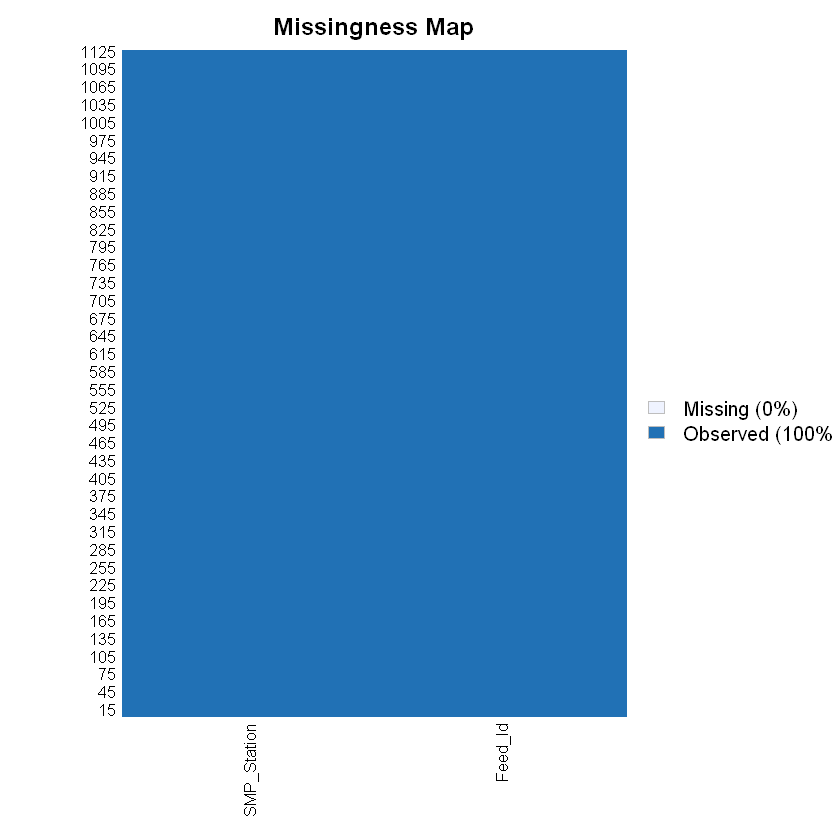

In [125]:
missmap(feed_station_nodup) ##no missing data

### Merge the datasets

#### Joining the 2 tables using Left join

In [126]:
mergedata = merge(x= consumption_nodup, y=feed_station_nodup, by="Feed_Id", all.x=TRUE)

In [127]:
head(mergedata)

,Feed_Id,Stamp,Track,Artist,Feed_Name,Date,Time,SMP_Station
,<chr>,<dttm>,<chr>,<chr>,<chr>,<date>,<times>,<chr>
1,feed_id_01,2019-01-01 17:48:00,Song_05,artist_03,feed_name_572,2019-01-01,17:48:00,smp_station_name_1027
2,feed_id_01,2019-01-08 07:26:00,Song_05,artist_03,feed_name_572,2019-01-08,07:26:00,smp_station_name_1027
3,feed_id_01,2019-01-09 12:05:00,Song_05,artist_03,feed_name_572,2019-01-09,12:05:00,smp_station_name_1027
4,feed_id_01,2019-01-10 17:14:00,Song_05,artist_03,feed_name_572,2019-01-10,17:14:00,smp_station_name_1027
5,feed_id_01,2019-01-13 09:47:00,Song_05,artist_03,feed_name_572,2019-01-13,09:47:00,smp_station_name_1027
6,feed_id_01,2019-01-14 08:58:00,Song_05,artist_03,feed_name_572,2019-01-14,08:58:00,smp_station_name_1027


In [128]:
summary(mergedata)

   Feed_Id              Stamp                        Track          
 Length:517021      Min.   :2019-01-01 00:02:00   Length:517021     
 Class :character   1st Qu.:2019-06-17 12:47:00   Class :character  
 Mode  :character   Median :2019-11-13 20:43:00   Mode  :character  
                    Mean   :2019-11-17 05:25:42                     
                    3rd Qu.:2020-04-22 12:44:00                     
                    Max.   :2020-09-30 23:57:00                     
    Artist           Feed_Name              Date                 Time         
 Length:517021      Length:517021      Min.   :2019-01-01   Min.   :00:00:00  
 Class :character   Class :character   1st Qu.:2019-06-17   1st Qu.:06:04:00  
 Mode  :character   Mode  :character   Median :2019-11-13   Median :11:52:00  
                                       Mean   :2019-11-16   Mean   :11:53:56  
                                       3rd Qu.:2020-04-22   3rd Qu.:17:35:50  
                                       Max.

 #### Missing SMP station - merged data
 
 30270 Feed_Ids are not mapped with a SMP_Station

In [129]:
count(mergedata %>% filter(is.na(mergedata$SMP_Station)))

n
<int>
30270


In [130]:
head(mergedata %>% filter(is.na(mergedata$SMP_Station)))

,Feed_Id,Stamp,Track,Artist,Feed_Name,Date,Time,SMP_Station
,<chr>,<dttm>,<chr>,<chr>,<chr>,<date>,<times>,<chr>
1,feed_id_05,2020-03-15 08:23:05,Song_04,artist_07,feed_name_1306,2020-03-15,08:23:05,NA
2,feed_id_05,2020-06-11 15:41:42,Song_04,artist_07,feed_name_1306,2020-06-11,15:41:42,NA
3,feed_id_07,2019-01-31 14:41:01,Song_05,artist_03,feed_name_31,2019-01-31,14:41:01,NA
4,feed_id_07,2019-02-01 11:28:39,Song_05,artist_03,feed_name_31,2019-02-01,11:28:39,NA
5,feed_id_07,2019-02-02 06:09:33,Song_05,artist_03,feed_name_31,2019-02-02,06:09:33,NA
6,feed_id_07,2019-02-02 16:45:28,Song_05,artist_03,feed_name_31,2019-02-02,16:45:28,NA


##### Recoding missing values of SMP Station variable using Feed_Name


In [132]:
mergedata$SMP_Station <- ifelse(is.na(mergedata$SMP_Station),
                                mergedata$Feed_Name, mergedata$SMP_Station)

After recoding no empty values found in the merged dataset

In [133]:
count(mergedata %>% filter(is.na(mergedata$SMP_Station)))

n
<int>
0


In [134]:
summary(mergedata)

   Feed_Id              Stamp                        Track          
 Length:517021      Min.   :2019-01-01 00:02:00   Length:517021     
 Class :character   1st Qu.:2019-06-17 12:47:00   Class :character  
 Mode  :character   Median :2019-11-13 20:43:00   Mode  :character  
                    Mean   :2019-11-17 05:25:42                     
                    3rd Qu.:2020-04-22 12:44:00                     
                    Max.   :2020-09-30 23:57:00                     
    Artist           Feed_Name              Date                 Time         
 Length:517021      Length:517021      Min.   :2019-01-01   Min.   :00:00:00  
 Class :character   Class :character   1st Qu.:2019-06-17   1st Qu.:06:04:00  
 Mode  :character   Mode  :character   Median :2019-11-13   Median :11:52:00  
                                       Mean   :2019-11-16   Mean   :11:53:56  
                                       3rd Qu.:2020-04-22   3rd Qu.:17:35:50  
                                       Max.

## Avoid DOUBLE COUNT PLAY

We are supposed to avoid double count of plays from feeds coming to same station. So the requisites for this condistion are:

Records with.. 

**same timestamp**, 

**same track**, 

**same station**  and also have

**(I)same Feed_Id OR (II)different Feed_Id** ... should be removed.



(I) such duplicates have already been removed in the initial stage

(II) such duplicates are removed below

#### filtering out the 'good' data, that is data unique on combination of variables- feed ID, track, stamp and station

In [135]:
gooddata <- mergedata %>% group_by(Track, Stamp, SMP_Station) %>% filter(n()==1)

515866 good observations

In [136]:
summary(gooddata) #515866 observations

   Feed_Id              Stamp                        Track          
 Length:515866      Min.   :2019-01-01 00:02:00   Length:515866     
 Class :character   1st Qu.:2019-06-17 13:24:00   Class :character  
 Mode  :character   Median :2019-11-13 19:02:00   Mode  :character  
                    Mean   :2019-11-17 05:46:40                     
                    3rd Qu.:2020-04-22 13:56:45                     
                    Max.   :2020-09-30 23:57:00                     
    Artist           Feed_Name              Date                 Time         
 Length:515866      Length:515866      Min.   :2019-01-01   Min.   :00:00:00  
 Class :character   Class :character   1st Qu.:2019-06-17   1st Qu.:06:03:00  
 Mode  :character   Mode  :character   Median :2019-11-13   Median :11:52:00  
                                       Mean   :2019-11-16   Mean   :11:53:56  
                                       3rd Qu.:2020-04-22   3rd Qu.:17:36:00  
                                       Max.

#### filtering out the 'bad' data, that is data duplicated on combination of variables- Stamp, station and track, but differing on Feed ID

In [137]:
baddata <- mergedata %>% group_by(Track, Stamp, SMP_Station) %>% filter(n()>1)

1155 bad observations

In [138]:
summary(baddata)

   Feed_Id              Stamp                        Track          
 Length:1155        Min.   :2019-01-02 21:10:50   Length:1155       
 Class :character   1st Qu.:2019-05-10 11:44:01   Class :character  
 Mode  :character   Median :2019-12-14 19:42:00   Mode  :character  
                    Mean   :2019-11-10 17:26:13                     
                    3rd Qu.:2020-03-23 09:24:00                     
                    Max.   :2020-09-30 02:51:42                     
    Artist           Feed_Name              Date                 Time         
 Length:1155        Length:1155        Min.   :2019-01-02   Min.   :00:08:12  
 Class :character   Class :character   1st Qu.:2019-05-10   1st Qu.:07:32:53  
 Mode  :character   Mode  :character   Median :2019-12-14   Median :11:44:01  
                                       Mean   :2019-11-10   Mean   :11:56:21  
                                       3rd Qu.:2020-03-23   3rd Qu.:15:52:23  
                                       Max.

Now, below is a case where 2 different feed ids feed_id_1454 and feed_id_504, have played the same song, Song_05, at same time, 2019-01-02 21:10:50, for the same station, feed_name_202


feed_id_1454,	2019-01-02 21:10:50,	Song_05	artist_03,	feed_name_202,	2019-01-02,	21:10:50,	feed_name_202

feed_id_504,	2019-01-02 21:10:50,	Song_05	artist_03,	feed_name_202,	2019-01-02,	21:10:50,	feed_name_202

In [139]:
head(baddata[order(baddata$Stamp),])

Feed_Id,Stamp,Track,Artist,Feed_Name,Date,Time,SMP_Station
<chr>,<dttm>,<chr>,<chr>,<chr>,<date>,<times>,<chr>
feed_id_1454,2019-01-02 21:10:50,Song_05,artist_03,feed_name_202,2019-01-02,21:10:50,feed_name_202
feed_id_504,2019-01-02 21:10:50,Song_05,artist_03,feed_name_202,2019-01-02,21:10:50,feed_name_202
feed_id_136,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,20:58:02,feed_name_571
feed_id_680,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,20:58:02,feed_name_571
feed_id_78,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,20:58:02,feed_name_571
feed_id_879,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,20:58:02,feed_name_571


#### now, retaining one of the records from the duplicated 'bad' data groups, **using Stamp**

As we care to keep only 1 of the duplicated record.

In [140]:
gooddata2 <- baddata %>% distinct(Stamp, .keep_all=TRUE)

541 good observation after removing the duplicates on Stamp, Track and Station

In [141]:
summary(gooddata2)

   Feed_Id              Stamp                        Track          
 Length:541         Min.   :2019-01-02 21:10:50   Length:541        
 Class :character   1st Qu.:2019-05-17 22:30:33   Class :character  
 Mode  :character   Median :2019-12-24 18:36:50   Mode  :character  
                    Mean   :2019-11-16 12:27:35                     
                    3rd Qu.:2020-03-24 16:21:00                     
                    Max.   :2020-09-30 02:51:42                     
    Artist           Feed_Name              Date                 Time         
 Length:541         Length:541         Min.   :2019-01-02   Min.   :00:08:12  
 Class :character   Class :character   1st Qu.:2019-05-17   1st Qu.:07:32:53  
 Mode  :character   Mode  :character   Median :2019-12-24   Median :11:46:41  
                                       Mean   :2019-11-16   Mean   :11:56:59  
                                       3rd Qu.:2020-03-24   3rd Qu.:15:52:23  
                                       Max.

In [142]:
head(gooddata2[order(gooddata2$Feed_Id, gooddata2$SMP_Station),]) #546 observations

Feed_Id,Stamp,Track,Artist,Feed_Name,Date,Time,SMP_Station
<chr>,<dttm>,<chr>,<chr>,<chr>,<date>,<times>,<chr>
feed_id_1022,2020-08-06 10:26:05,Song_05,artist_03,feed_name_700,2020-08-06,10:26:05,feed_name_700
feed_id_1022,2020-08-15 04:16:10,Song_05,artist_03,feed_name_700,2020-08-15,04:16:10,feed_name_700
feed_id_1022,2020-09-01 11:42:36,Song_05,artist_03,feed_name_700,2020-09-01,11:42:36,feed_name_700
feed_id_1022,2020-09-06 14:31:42,Song_05,artist_03,feed_name_700,2020-09-06,14:31:42,feed_name_700
feed_id_1054,2019-01-26 15:14:23,Song_05,artist_03,feed_name_209,2019-01-26,15:14:23,feed_name_209
feed_id_1054,2019-02-14 20:41:25,Song_05,artist_03,feed_name_209,2019-02-14,20:41:25,feed_name_209


#### Now Combining both 'good' data sets

In [143]:
finaldata <- rbind(gooddata, gooddata2)


516407 observations after combining (515866 + 541) good data sets

In [144]:
summary(finaldata) #516407 observations


   Feed_Id              Stamp                        Track          
 Length:516407      Min.   :2019-01-01 00:02:00   Length:516407     
 Class :character   1st Qu.:2019-06-17 13:12:00   Class :character  
 Mode  :character   Median :2019-11-13 20:15:00   Mode  :character  
                    Mean   :2019-11-17 05:45:34                     
                    3rd Qu.:2020-04-22 13:40:00                     
                    Max.   :2020-09-30 23:57:00                     
    Artist           Feed_Name              Date                 Time         
 Length:516407      Length:516407      Min.   :2019-01-01   Min.   :00:00:00  
 Class :character   Class :character   1st Qu.:2019-06-17   1st Qu.:06:03:00  
 Mode  :character   Mode  :character   Median :2019-11-13   Median :11:52:00  
                                       Mean   :2019-11-16   Mean   :11:53:56  
                                       3rd Qu.:2020-04-22   3rd Qu.:17:36:00  
                                       Max.

In [145]:
str(finaldata)

grouped_df [516,407 x 8] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Feed_Id    : chr [1:516407] "feed_id_01" "feed_id_01" "feed_id_01" "feed_id_01" ...
 $ Stamp      : POSIXct[1:516407], format: "2019-01-01 17:48:00" "2019-01-08 07:26:00" ...
 $ Track      : chr [1:516407] "Song_05" "Song_05" "Song_05" "Song_05" ...
 $ Artist     : chr [1:516407] "artist_03" "artist_03" "artist_03" "artist_03" ...
 $ Feed_Name  : chr [1:516407] "feed_name_572" "feed_name_572" "feed_name_572" "feed_name_572" ...
 $ Date       : Date[1:516407], format: "2019-01-01" "2019-01-08" ...
 $ Time       : 'times' num [1:516407] 17:48:00 07:26:00 12:05:00 17:14:00 09:47:00 ...
  ..- attr(*, "format")= chr "h:m:s"
 $ SMP_Station: chr [1:516407] "smp_station_name_1027" "smp_station_name_1027" "smp_station_name_1027" "smp_station_name_1027" ...
 - attr(*, "groups")= tibble [516,407 x 4] (S3: tbl_df/tbl/data.frame)
  ..$ Track      : chr [1:516407] "Song_01" "Song_01" "Song_01" "Song_01" ...
  ..$ Stamp      : POSIXct

### Export final data set (cleaned and transformed) to visualize in Tableau

In [146]:
write.csv(finaldata, "Radiofeed_cleandata.csv", row.names=FALSE)

## Further analysis using visualization in Tableau